In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Load your CSV file
df = pd.read_csv("../Data/Cleaned/sanitized_property_listings_Kelli_final.csv")

if df is None:
    print("DataFrame not loaded correctly, df is None.")
else:
    print("DataFrame loaded successfully.")

print(df.shape)  # This will display the shape of the DataFrame

# Sort the DataFrame by 'Price' in descending order and exclude the first 16 rows. These were checked as 'bad data' outliers.
df_sorted = df.sort_values(by='Price', ascending=False).iloc[16:]
df_sorted = df[df['Price'] < 1000000]
print(df_sorted.shape)


DataFrame loaded successfully.
(9033, 15)
(8356, 15)



## Kelli
### Comparing boxplots before and after manual outlier removal calculation
Conclusion:
    The first boxplot (before outlier removal) is useful to understand the full range and outlier impact on property prices.
    The second boxplot (after outlier removal) gives a better representation of the central market trends and is less affected by extreme values.
    By comparing the two boxplots, you can see how outliers impact the central tendency (median) and the spread of data. Removing them provides a cleaner and more focused view of the typical property prices.

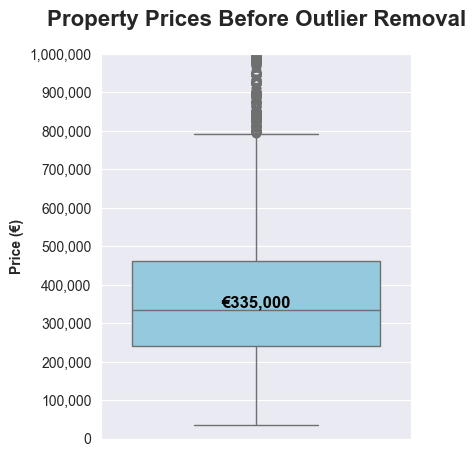

In [27]:
# Plot before outlier removal
fig, ax = plt.subplots(figsize=(4, 5))
sns.boxplot(y='Price', data=df_sorted, color="skyblue")
plt.title('Property Prices Before Outlier Removal', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Price (€)', fontweight='bold')
# Set custom y-axis tick labels
yticks = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]
plt.yticks(yticks, [f'{y:,.0f}' for y in yticks])
plt.ylim(0, 1000000)
yticks = np.arange(0, 1000000 + 100000, 100000)  # Create y-ticks at intervals of 100,000 euros
# plt.yticks(yticks, [f'€ {y:,.0f}' for y in yticks])  # Format y-tick labels with euro symbol

median_price = df_sorted['Price'].median()
plt.text(0, median_price, f'€{median_price:,.0f}', ha='center', va='bottom', fontsize=12, color='black',
         fontweight='bold')
plt.show()

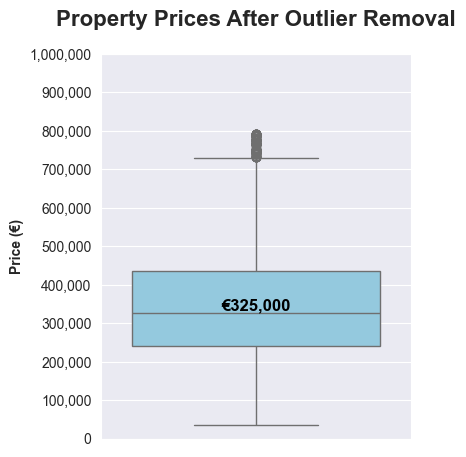

In [28]:
# IQR
# Calculate the upper and lower limits based on IQR
Q1 = df_sorted['Price'].quantile(0.25)
Q3 = df_sorted['Price'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Identify the indices of rows that are upper and lower outliers
outliers = df_sorted[(df_sorted['Price'] < lower) | (df_sorted['Price'] > upper)].index

# Remove all outliers from the DataFrame
df_cleaned = df_sorted.drop(index=outliers)

# Plot after outlier removal
plt.figure(figsize=(4, 5))
sns.boxplot(y='Price', data=df_cleaned, color="skyblue")
plt.title('Property Prices After Outlier Removal', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Price (€)', fontweight='bold')

max_value = df_cleaned['Price'].max()
plt.ylim(0, 1000000)
yticks = np.arange(0, 1000000 + 100000, 100000)  # Create y-ticks at intervals of 100,000 euros
plt.yticks(yticks, [f'{y:,.0f}' for y in yticks])  # Format y-tick labels with euro symbol

# Add an annotation for the median value inside the box
median_price = df_cleaned['Price'].median()
plt.text(0, median_price, f'€{median_price:,.0f}', ha='center', va='bottom', fontsize=12, 
         color='black', fontweight='bold')


plt.show()

### Histogram to compare price distribution before and after outlier removal
The bars in the histogram are grouped into bins based on the range of values they represent. They are essentially ranges of the price values. The width of each bin determines how many values will be grouped together within that bin. For instance, if you have prices ranging from €0 to €1,000,000, and you use 30 bins, each bin would represent a range of approximately €33,333.

Calculate the upper and lower limits based on IQR (interquartile range).

Frequency refers to the count of data points (or number of occurrences) that fall within each bin of the histogram. This reduced after outliers have been accounted for because the number of listings was also reduced bringing the top of the hill down.

Impact of Outliers on Data:
    In the before histogram, the long tail towards the higher end indicates that there were properties significantly more expensive than the rest, causing positive skew.
    In the after histogram, removing these extreme values leads to a more balanced representation of the typical property prices, focusing on the core data.

Central Tendency:
    The peak of the histogram after outlier removal is more indicative of the true central tendency of property prices, as it is not pulled by extreme high values.
    The mean and median values become more representative of the majority of the properties after outliers are removed.    

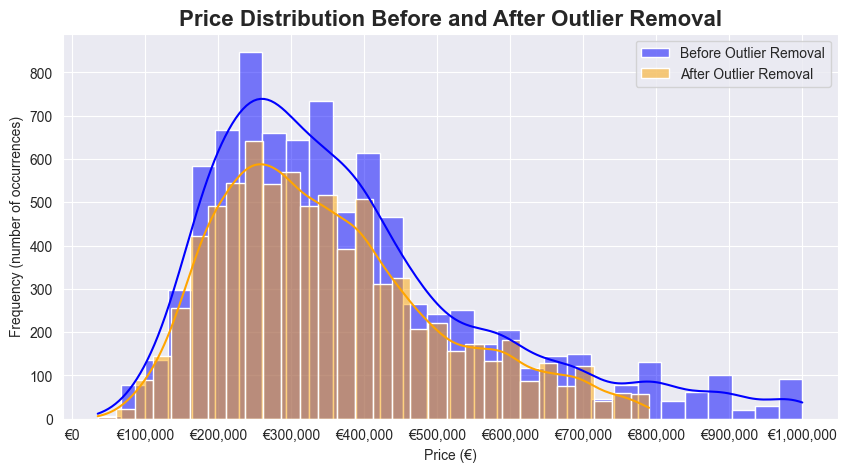

In [9]:
def histogram_outlier_removal(dataset_clean, dataset_outliers):
    plt.figure(figsize=(10, 5))
    # Plot a histogram to compare price distribution before and after outlier removal
    sns.histplot(dataset_outliers['Price'], color='blue', label='Before Outlier Removal', kde=True, bins=30)
    sns.histplot(dataset_clean['Price'], color='orange', label='After Outlier Removal', kde=True, bins=30)
    
    plt.title('Price Distribution Before and After Outlier Removal', fontsize=16, fontweight='bold')
    plt.xlabel('Price (€)')
    plt.ylabel('Frequency (# of occurrences)')
    plt.legend()

    # Set x-axis tick labels to add more points, at intervals of 100,000 euros
    max_price = max(dataset_outliers['Price'].max(), dataset_clean['Price'].max())  # Get the maximum value from both datasets
    tick_interval = 100000  # Set tick interval at 100,000 euros
    ticks = np.arange(0, max_price + tick_interval, tick_interval)  # Create an array of tick positions at 100,000 intervals
    plt.xticks(ticks, [f'€{int(x):,}' for x in ticks])  # Set the x-axis tick labels with formatting
    plt.show()
    
histogram_outlier_removal(df_cleaned, df_sorted)